# Overview 
    As the volumn of data explosively grows in modern society, people are becoming more incapable of handling these data themselves. Instead, people developed a bunch of useful tools on computer to help them understand the data. One of the most prevalent tool for analyzing data is Linear Regression model. Today, we are going to use linear regression model on a diabetes data set from sklearn to try to understand the underlying meaning of diabetes dataset. We will perform an EDA first to see the overall relationships between factors and use linear regression to verify. In the end, I will also use some other method to check whether linear regression is a good enough tool for the problem.

# Data
    The dataset "diabetes" is coming from sklearn's database. It includes 442 records of diabetes patient and their 11 different information, "age, sex, bmi, bp, s1, s2, s3, s4, s5, s6" respectively. Also, it has a value called target for us to know how severe the diabetes's condition is. We are trying to find the corretion between variables and target. 

First, we need to load the library

In [22]:
# %matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df["target"] = diabetes.target
diabetes = diabetes.data
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


# Exploratory Data Analysis 

Since we are trying to understand the hidden relationships and correlations under the diabetes dataset, it is quite helpful for us to take a EDA on the dataset and have a good look of what might be going on. 

The next thing we need to do is take a quick look at the dataset so that we might get a hint on how to analyze the data next

The first thing to look at is the dimensions of the dataset

In [2]:
df.shape

(442, 11)

This dataset has 442 records of diabetes patient. Each record has 10 elements, 9 variables and 1 result(target).

Check whether there is null values in the dataset

In [3]:
df.isnull().values.any()

False

This dataset turns out to be quite clean without any missing value. I guess it is preprocessed by professional people and then uploaded. 

Summary for numeric independent variables


In [4]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


Build a histogram of target

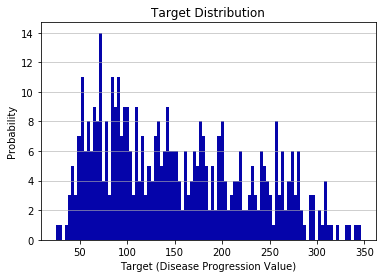

In [5]:
n, bins, patches = plt.hist(x = df.target, bins = 100, color = '#0504aa')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Target (Disease Progression Value)')
plt.ylabel('Probability')
plt.title('Target Distribution')
plt.show()

Then we can take a look at the scatter plot of target against its variables

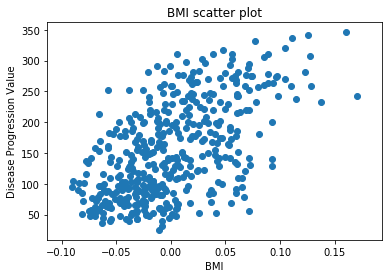

In [6]:
# scatter plot of BMI against target
plt.scatter(df.bmi, df.target)

plt.xlabel('BMI')
plt.ylabel('Disease Progression Value')
plt.title('BMI scatter plot')
plt.show()

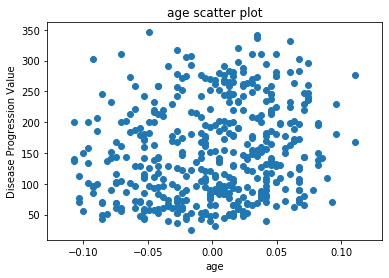

In [7]:
# scatter plot of BMI against target
plt.scatter(df.age, df.target)

plt.xlabel('age')
plt.ylabel('Disease Progression Value')
plt.title('age scatter plot')
plt.show()

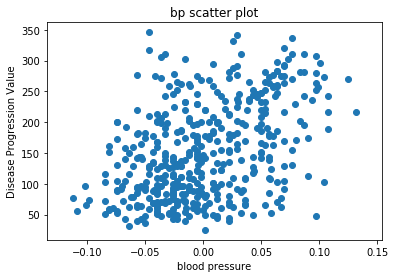

In [8]:
# scatter plot of BMI against target
plt.scatter(df.bp, df.target)

plt.xlabel('blood pressure')
plt.ylabel('Disease Progression Value')
plt.title('bp scatter plot')
plt.show()

From the scatter plots we seen above, there seem to be little relation between (target, age) and (target, bp). However, (target, BMI) seem to be positively related to each other

next we take a heatmap of correlation on the diabetes dataset

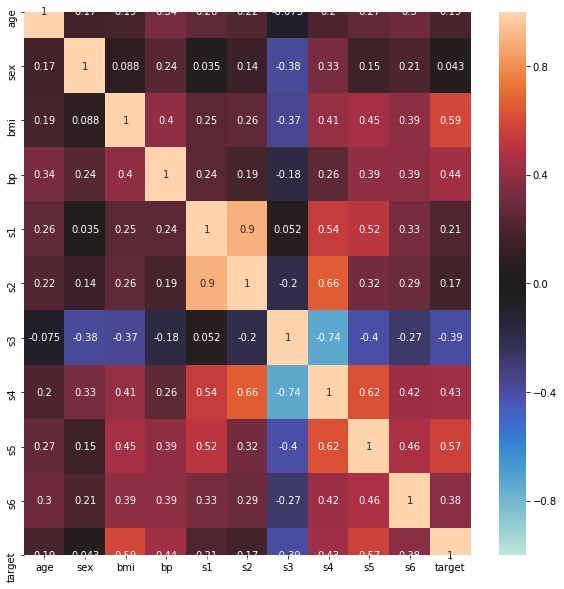

In [9]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
corrmat = df.corr() # Omit year
sns.heatmap(corrmat,-1,1,ax=ax,center=0,annot=True);


For the colinearity, I believe it exist in this data set. There are many variables have pearson's R more than 0.5 which means that they are high correlated to each other. Also, for the matter of diabetes, I believe it can be caused by many factors together. Therefore, I have goood reason to believe that colinearity matters in this dataset. 

Next, lets generate an linear regression on the BMI against target

# Models
    The next step is to understand the dataset is to build some models and put the data in so that we can have a look about how can a computer interpret the data. For this assignment, I will use the linear regression model to find the underlying correlation. 

In [18]:
from sklearn.linear_model import LinearRegression
from scipy import stats

# linear regression model on BMI against target
slope, intercept, r_value, p_value, std_err = stats.linregress(df.bmi, df.target)
print("the resulting regression prediction has \n\tthe slope as %f, \n\tintercept as %f,\
        \n\tr square value as %f, \n\tp value as %f and \n\tstandard error as %f" % (slope, intercept, r_value, p_value, std_err))

the resulting regression prediction has 
	the slope as 949.435260, 
	intercept as 152.133484,        
	r square value as 0.586450, 
	p value as 0.000000 and 
	standard error as 62.515122


And thus, the formula for this regression is y = 949.43x + 152

To find accuracy of the slope, we will implement the linear regression in sklearn

In [19]:
reg = LinearRegression().fit(df.bmi[:, None], df.target)
reg.score(df.bmi[:, None], df.target)

0.3439237602253803

By implementing the score function in linear regression object, we can see that only about 35% of data is predicted exactly from the model. Although the precision rate is quite low as only 35%, there is a good reason to accept the model because this is not a classification problem. Instead, the predicted value is continuous, which means although the exact precision is 35%, there should be many values sitting around the regression line. Also, based on the graph we made in EDA, we can see that even though BMI is more related to target than other variables, it is still quite spread in the graph. Therefore, I would say this regression model is acceptable. 

After trying this regression model, I would like to incorporate more variables. To figure out which variables should I incorporate into my model, I would use PCA to find out the most influencing variables in the data set.

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(diabetes)

principalreg = LinearRegression().fit(principalComponents, df.target)

intercept2, slope2 = principalreg.intercept_, principalreg.coef_
print(" the new linear regression line has slope as %f and %f and %f respectively, intercept as %f" % (*slope2, intercept2))
print("the precision is %f" % principalreg.score(principalComponents, df.target))

 the new linear regression line has slope as 448.194857 and -256.747490 and 238.245422 respectively, intercept as 152.133484
the precision is 0.372071


With the help of 3 variables predicting the regression together, get the model that is slightly better than the original model. I would say this is a meaning for improvement. 

# Conclusions

Linear regression is definitely a simple and powerful tool for people to do analysis on seemingly random dataset. I have used BMI as the only variable against target and got a decent result as 35%. Furthermore, by using pca, I managed to select 3 more important variables contributing the to target. By initializing the linear regression model with these 3 principal componets, the linear regression model the precision rate improved to 37%. However, I would not say this model is a very good approach for the diabetes dataset because most of relationship of variables vs target are quite spreaded out. I hope in future, we can learn some model that can better explain the dataset diabetes. 